In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


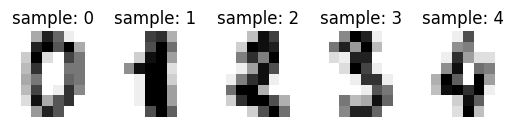

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [6]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [7]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

In [9]:
import torch
import torch.nn as nn
from torch import optim

In [10]:
# 모델 정의: 순차적인 레이어 구조
model = nn.Sequential(
    nn.Linear(64, 32), # 입력층: 64, 첫 번째 은닉층: 32
    nn.ReLU(),         # 활성화 함수: ReLU
    nn.Linear(32, 16), # 첫 번째 은닉층: 32, 두 번째 은닉층: 16
    nn.ReLU(),         # 활성화 함수: ReLU
    nn.Linear(16, 10)  # 두 번째 은닉층: 16, 출력층: 10 (클래스의 개수)
)

In [11]:
# 입력 데이터 X와 레이블 Y를 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [12]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [13]:
optimizer = optim.Adam(model.parameters())

In [15]:
losses = []

In [19]:
# 총 100번의 에포크 동안 모델 학습
for epoch in range(500):
  optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
  y_pred = model(X)          # 순전파 연산으로 예측값 계산
  loss = loss_fn(y_pred, Y)  # 손실 함수로 비용 계산
  loss.backward()            # 역전파 연산으로 기울기 계산
  optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

  # 10번째 에포크마다 현재 에포크와 손실 값 출력
  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  # 손실 값을 리스트에 추가하여 추적
  losses.append(loss.item())


Epoch    0/100 Cost: 0.006018
Epoch   10/100 Cost: 0.005767
Epoch   20/100 Cost: 0.005530
Epoch   30/100 Cost: 0.005308
Epoch   40/100 Cost: 0.005098
Epoch   50/100 Cost: 0.004900
Epoch   60/100 Cost: 0.004713
Epoch   70/100 Cost: 0.004536
Epoch   80/100 Cost: 0.004368
Epoch   90/100 Cost: 0.004209
Epoch  100/100 Cost: 0.004059
Epoch  110/100 Cost: 0.003916
Epoch  120/100 Cost: 0.003780
Epoch  130/100 Cost: 0.003651
Epoch  140/100 Cost: 0.003528
Epoch  150/100 Cost: 0.003411
Epoch  160/100 Cost: 0.003300
Epoch  170/100 Cost: 0.003193
Epoch  180/100 Cost: 0.003091
Epoch  190/100 Cost: 0.002994
Epoch  200/100 Cost: 0.002900
Epoch  210/100 Cost: 0.002811
Epoch  220/100 Cost: 0.002726
Epoch  230/100 Cost: 0.002644
Epoch  240/100 Cost: 0.002565
Epoch  250/100 Cost: 0.002490
Epoch  260/100 Cost: 0.002418
Epoch  270/100 Cost: 0.002348
Epoch  280/100 Cost: 0.002282
Epoch  290/100 Cost: 0.002218
Epoch  300/100 Cost: 0.002157
Epoch  310/100 Cost: 0.002099
Epoch  320/100 Cost: 0.002042
Epoch  330

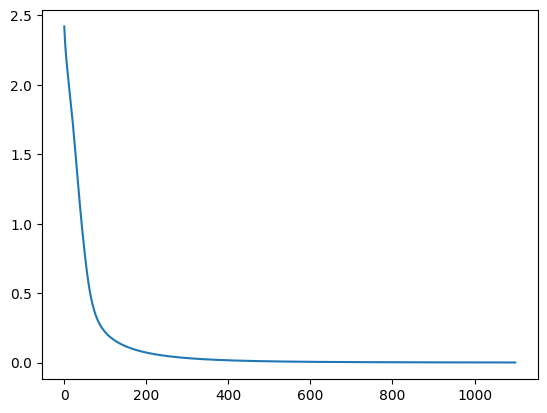

In [20]:
plt.plot(losses)